<div style="text-align: center; padding: 20px; background-color: #f9f9f9; border-radius: 10px; border: 1px solid #ccc;">
<div style="background-color: #f9f9f9; border-radius: 15px; padding: 20px; border: 1px solid #ccc;">

<h1 style="font-size: 40px; color: #2c3e50;">
🎬 Movie Ratings Analysis Dashboard
</h1>

<p style="font-size: 18px; color: #555;">
Explore, filter, and visualize top-rated movies from the IMDB Top 1000 list. <br>
Get insights into genres, directors, runtimes, and much more — all in one interactive notebook!
</p>

</div>


<!-- 📥 Load and Clean Dataset -->
<h2 style="color: #2c3e50;">📥 Step 1: Load and Clean Dataset</h2>


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, Image, HTML

# Load CSV
df = pd.read_csv("imdb_top_1000.csv")

# Clean data
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)
df.dropna(inplace=True)
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


---

<!-- 📊 Genre Analysis -->
<h2 style="color: #2c3e50;">📊 Step 2: Top 10 Genres by Movie Count</h2>

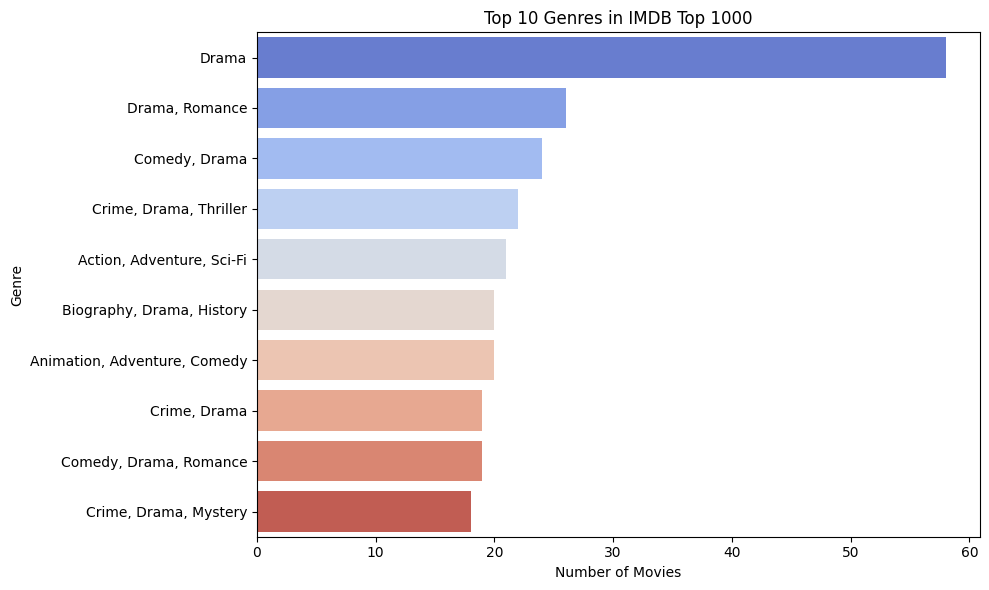

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare top genres DataFrame
top_genres = df['Genre'].value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']

# Plot with hue for color palette
plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='Count', y='Genre', hue='Genre', palette='coolwarm', dodge=False, legend=False)
plt.title("Top 10 Genres in IMDB Top 1000")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


---


<!-- 📈 Animated Scatter Plot -->
<h2 style="color: #2c3e50;">📈 Step 3: Animated IMDB Ratings vs Runtime (Plotly)</h2>

In [20]:
fig = px.scatter(df,
                 x='Runtime',
                 y='IMDB_Rating',
                 size='IMDB_Rating',
                 color='Genre',
                 animation_frame='Released_Year',
                 hover_name='Series_Title',
                 title='🎥 Animated Ratings by Runtime Over Years',
                 template='plotly_dark')

fig.update_layout(
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 1000, "redraw": True},
                                "fromcurrent": True,
                                "transition": {"duration": 500}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

fig.show(renderer="iframe")

---


<!-- 🎛️ Interactive Genre Filter -->
<h2 style="color: #2c3e50;">🎛️ Step 5: Interactive Filter - Top 10 Movies by Genre</h2>


In [24]:
genre_dropdown = widgets.Dropdown(
    options=df['Genre'].unique(),
    value='Drama',
    description='Genre:'
)

def filter_genre(genre):
    subset = df[df['Genre'] == genre].sort_values(by='IMDB_Rating', ascending=False).head(10)
    fig = px.bar(subset, x='Series_Title', y='IMDB_Rating', color='IMDB_Rating',
                title=f"Top 10 {genre} Movies", color_continuous_scale='Agsunset')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

widgets.interact(filter_genre, genre=genre_dropdown)


interactive(children=(Dropdown(description='Genre:', options=('Drama', 'Crime, Drama', 'Action, Crime, Drama',…

<function __main__.filter_genre(genre)>

---


<!-- 🖼️ Add Poster or GIF -->
<h2 style="color: #2c3e50;">🖼️ Movie Poster or GIF</h2>


In [49]:
from IPython.display import display, HTML

# List of movies with titles, ratings, and working image URLs
top_movies = [
    {"title": "The Shawshank Redemption", "rating": 9.3, "poster": "https://i.imgur.com/SuW2ZlC.jpg"},
    {"title": "The Godfather", "rating": 9.2, "poster": "https://i.imgur.com/Uzvny9I.jpg"},
    {"title": "The Dark Knight", "rating": 9.0, "poster": "https://i.imgur.com/3jLPB46.jpg"},
    {"title": "Schindler’s List", "rating": 8.9, "poster": "https://i.imgur.com/IWZJOmu.jpg"},
    {"title": "Avengers: Endgame", "rating": 8.4, "poster": "https://m.media-amazon.com/images/I/81ExhpBEbHL._AC_SY679_.jpg"}

]

# Create the poster display
html = '''
<h2 style="text-align:center; font-size:36px; color:#2c3e50;">🍿 Top 5 Movies You Can’t Miss</h2>
<div style="display: flex; justify-content: center; flex-wrap: wrap; gap: 30px; padding: 20px;">
'''

for movie in top_movies:
    html += f'''
    <div style="text-align: center; width: 180px;">
        <img src="{movie['poster']}" width="180" style="border-radius: 10px; box-shadow: 0 4px 12px rgba(0,0,0,0.4);">
        <p style="font-size:16px; font-weight:bold; color:#333; margin: 10px 0 5px;">{movie['title']}</p>
        <p style="font-size:14px; color:#777;">⭐ {movie['rating']}</p>
    </div>
    '''

html += '</div><hr style="height:3px; background-color:#2c3e50; margin-top: 30px;">'

display(HTML(html))


---


<!-- 🧠 Insights Summary -->
<h2 style="color: #2c3e50;">🧠 Step 7: Key Insights Summary</h2>


<div style="padding: 15px; background: #ecf0f1; border-left: 5px solid #2c3e50; margin: 10px 0;">
  <h3 style="color: #2c3e50;">🔍 Key Takeaways</h3>
  <ul>
    <li><b>Drama</b> is the most popular genre among top 1000 movies.</li>
    <li><b>Christopher Nolan</b> has multiple top-rated entries.</li>
    <li>Highly rated movies usually range between <b>120–150 minutes</b>.</li>
    <li>The 1990s and 2000s were rich in critically acclaimed films.</li>
  </ul>
</div>


<h2 style="color: #2c3e50;">📤 Genre Popularity</h2>


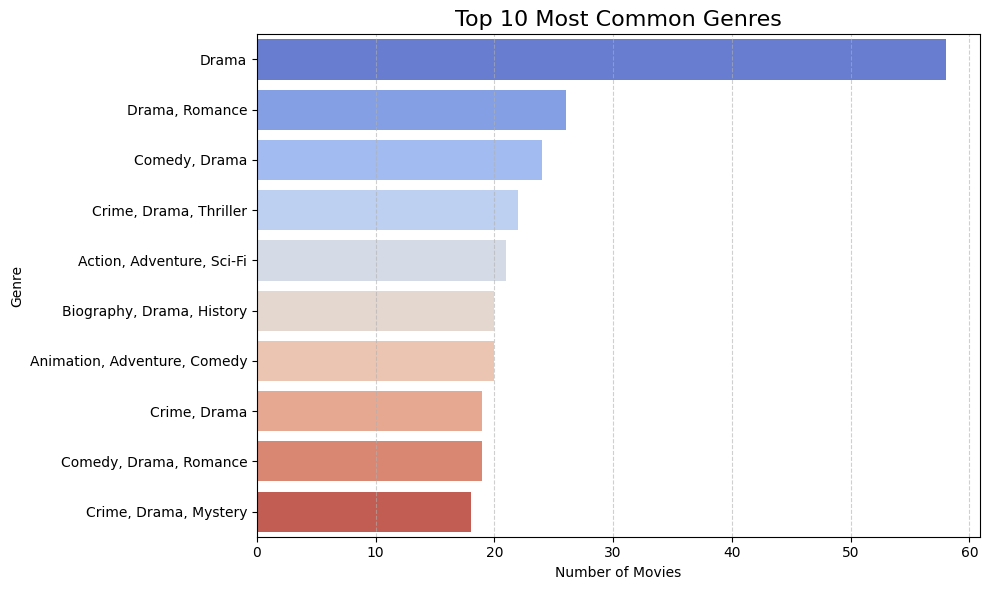

In [51]:
# Required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# HTML heading
display(HTML('''
<h2 style="color: #2c3e50;">🎭 Genre Popularity</h2>
<p style="color: #555;">Let's find out which movie genres are most popular in the IMDB Top 1000 dataset.</p>
<hr style="height:3px; background-color:#2c3e50;">
'''))

# Top genres
top_genres = df['Genre'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='coolwarm', legend=False)
plt.title("Top 10 Most Common Genres", fontsize=16)
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


---

<h2 style="color: #2c3e50;">📤 Top 10 Directors by Number of Movies</h2>


In [53]:
display(HTML('<h2 style="color: #2c3e50;">🎬 Top 10 Directors</h2><p style="color: #555;">Let\'s look at which directors have the most movies in the dataset.</p>'))

top_directors = df['Director'].value_counts().head(10)
fig = px.bar(
    x=top_directors.values,
    y=top_directors.index,
    orientation='h',
    labels={'x': 'Number of Movies', 'y': 'Director'},
    title='Top 10 Directors with Most Movies',
    color=top_directors.values,
    color_continuous_scale='Blues',
    template='plotly_white',
    height=500
)
fig.show()

display(HTML('<hr style="height:3px; background-color:#2c3e50;">'))


---

<h2 style="color: #2c3e50;">📤 Rating Distibution</h2>


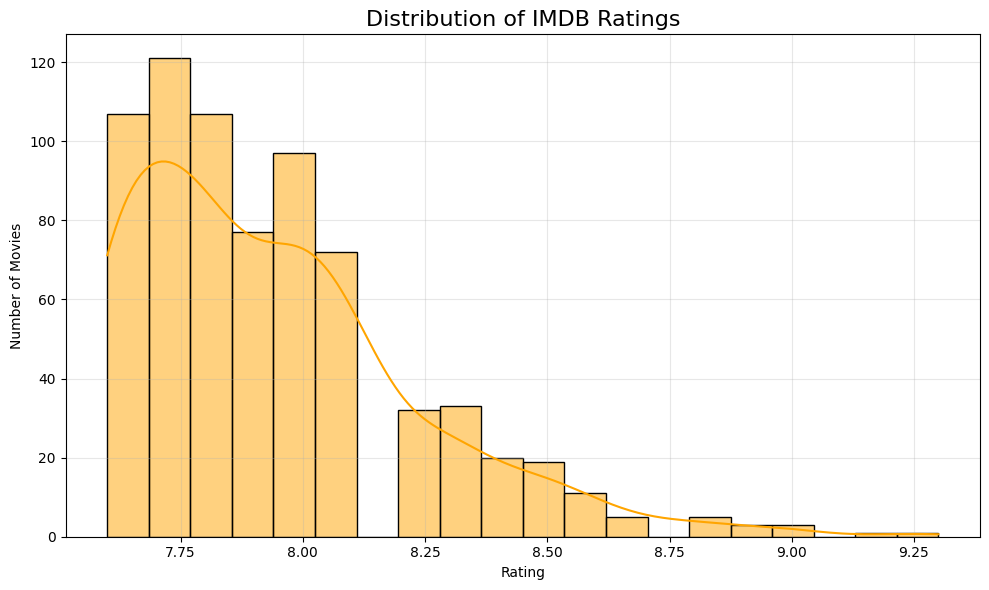

In [56]:
display(HTML('<h2 style="color: #2c3e50;">⭐ Rating Distribution</h2><p style="color: #555;">Explore how IMDB ratings are distributed across movies.</p>'))

plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='orange')
plt.title('Distribution of IMDB Ratings', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

display(HTML('<hr style="height:3px; background-color:#2c3e50;">'))


---

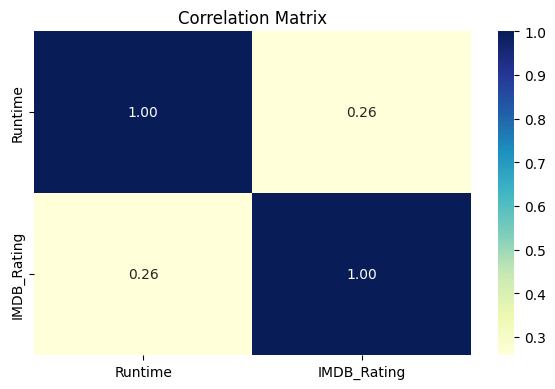

In [58]:
display(HTML('<h2 style="color: #2c3e50;">🧮 Correlation Heatmap</h2><p style="color: #555;">Understand the correlation between numerical features.</p>'))

corr = df[['Runtime', 'IMDB_Rating']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

display(HTML('<hr style="height:3px; background-color:#2c3e50;">'))
